# Sklearn

## Bike Sharing Demand
Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В исходной постановке задачи доступно 11 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются.

### Библиотеки

In [1]:
from sklearn import model_selection, linear_model, metrics

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

### Загрузка данных

In [3]:
raw_data = pd.read_csv('bike_sharing_demand.csv', header = 0, sep = ',')

In [4]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [5]:
print(raw_data.shape)

(10886, 12)


In [6]:
raw_data.isnull().values.any()

False

In [7]:
raw_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Предобработка данных

#### Типы признаков

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [9]:
raw_data["datetime"] = raw_data["datetime"].apply(pd.to_datetime)

In [10]:
raw_data['month'] = raw_data["datetime"].apply(lambda x : x.month)
raw_data['hour'] = raw_data["datetime"].apply(lambda x : x.hour)

In [11]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


#### Обучение и отложенный тест

In [12]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [13]:
print(raw_data.shape,"\n",train_data.shape, hold_out_test_data.shape)

(10886, 14) 
 (9886, 14) (1000, 14)


In [14]:
print('train period from {} to {}'.format(train_data["datetime"].min(), train_data["datetime"].max()))
print('evaluation period from {} to {}'.format(hold_out_test_data["datetime"].min(), hold_out_test_data["datetime"].max()))

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая функция

In [15]:
#обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis = 1)

In [16]:
#тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis = 1)

#### Целевая функция на обучающей выборке и на отложенном тесте

Text(0.5,1,'test data')

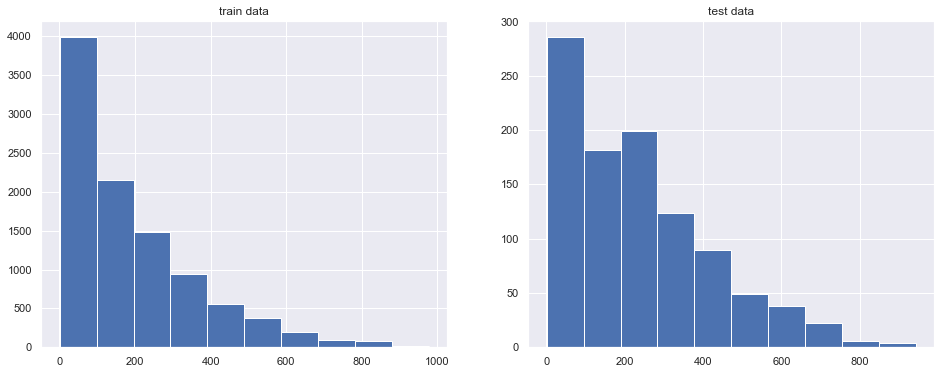

In [17]:
plt.figure(figsize = (16, 6))

plt.subplot(1,2,1)
plt.hist(train_labels)
plt.title('train data')

plt.subplot(1,2,2)
plt.hist(test_labels)
plt.title('test data')

В ООП стиле

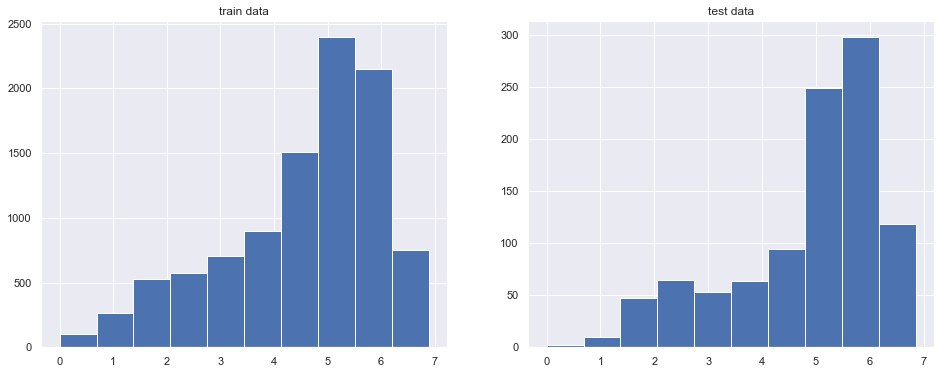

In [18]:
fig, ax = plt.subplots(1,2, figsize = (16, 6))

labels = [np.log(train_labels), np.log(test_labels)]

for i in range(len(labels)):
    ax[i].hist(labels[i])
ax[0].set(title = "train data")
ax[1].set(title = "test data");

In [19]:
from scipy.stats.mstats import normaltest

In [20]:
normaltest(train_labels)

NormaltestResult(statistic=1998.4477116096505, pvalue=0.0)

In [21]:
normaltest(np.log(train_labels))

NormaltestResult(statistic=1118.117841512352, pvalue=1.5988055854527407e-243)

#### Числовые признаки

In [22]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [23]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [24]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [25]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


### Модель

In [26]:
regressor = linear_model.SGDRegressor(random_state = 0)

In [27]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


17970504438931.574

In [345]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [346]:
print(regressor.predict(test_data)[:10])

[ -4.17417839e+13  -6.79265398e+13  -2.75628696e+13  -1.74917869e+13
  -1.73725573e+13  -2.59080211e+13  -2.61995763e+13  -2.53704069e+13
  -2.77335332e+13  -3.61556707e+13]


In [347]:
print(regressor.coef_)

[  6.77363695e+09   4.87092504e+10   4.66599712e+09   3.56187802e+10
  -1.13057088e+11  -8.24626030e+10   2.22349863e+10   3.21515398e+10]


### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [30]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.11793762963431502

In [351]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [352]:
print(regressor.predict(scaled_test_data)[:10])

[ 524.82767322  834.83176277  354.85768824  221.89221002  227.84049612
  324.88196372  327.8982227   307.9347954   345.90146969  445.90141764]


### Подозрительно хорошо?

In [31]:
print(regressor.coef_)

[ 1.41019246e+00 -1.40725539e+00  1.45346928e-02 -4.38984175e-02
  5.08589954e+01  1.48004811e+02 -8.23376876e-03  6.37720415e-03]


In [32]:
list(map(lambda x : round(x, 2), regressor.coef_))

[1.41, -1.41, 0.01, -0.04, 50.86, 148.0, -0.01, 0.01]

In [33]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [34]:
train_labels[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14])

In [35]:
np.all(train_data.registered + train_data.casual == train_labels)

True

In [36]:
train_data.drop(['casual', 'registered'], axis = 1, inplace = True)
test_data.drop(['casual', 'registered'], axis = 1, inplace = True)

In [37]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [38]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


121.81123864993025

In [39]:
print(list(map(lambda x : round(x, 2), regressor.coef_)))

[31.03, 29.96, -41.93, 6.17, 14.08, 49.6]


### Pipeline

In [40]:
from sklearn.pipeline import Pipeline, make_pipeline

In [41]:
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [42]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


121.81123864993025

### Подбор параметров

In [501]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [43]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__max_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}

In [44]:
grid_cv = model_selection.GridSearchCV(pipeline, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)

In [46]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 11 s, sys: 335 ms, total: 11.4 s
Wall time: 11.8 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'regression__max_iter': [3, 5, 10, 50], 'regression__penalty': ['l1', 'l2', 'none'], 'regression__alpha': [0.0001, 0.01], 'scaling__with_mean': [0.0, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [48]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-108.61449660348289
{'regression__alpha': 0.01, 'regression__loss': 'squared_loss', 'regression__max_iter': 3, 'regression__penalty': 'l2', 'scaling__with_mean': 0.0}


### Оценка по отложенному тесту

In [49]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

119.98978845935379

In [50]:
np.mean(test_labels)

232.159

In [51]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [209]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [210]:
print(test_predictions[:10])

[ 139.60470681  159.80765341  207.55935972  237.76288054  257.83836668
  267.44558034  272.49537469  297.70688522  304.29818873  313.58821156]


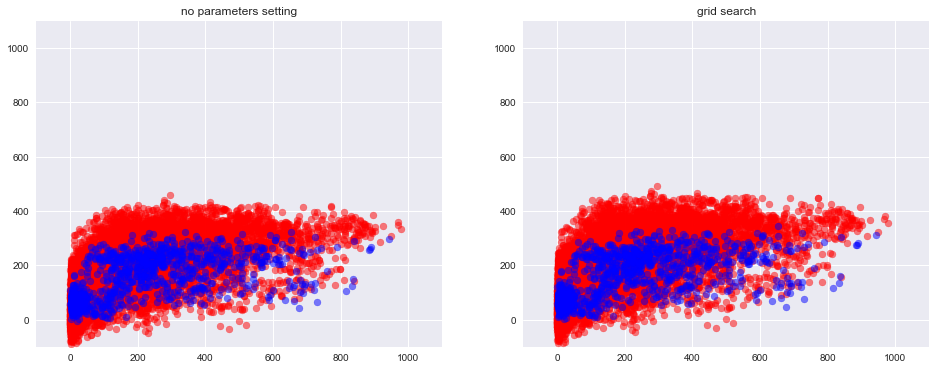

In [506]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.grid(True)
plt.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color = 'red')
plt.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color = 'blue')
plt.title('no parameters setting')
plt.xlim(-100,1100)
plt.ylim(-100,1100)

plt.subplot(1,2,2)
plt.grid(True)
plt.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
plt.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
plt.title('grid search')
plt.xlim(-100,1100)
plt.ylim(-100,1100);

## Мои эксперименты

1 - целевую переменную логарифмировать
2 - все переменные нормализовать
3 - сделать квадратичные признаки

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
polynom = PolynomialFeatures(2)

In [54]:
raw_data["datetime"] = raw_data["datetime"].apply(pd.to_datetime)
raw_data['month'] = raw_data["datetime"].apply(lambda x : x.month)
raw_data['hour'] = raw_data["datetime"].apply(lambda x : x.hour)

In [55]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour', "count"]

In [56]:
new_data = raw_data[numeric_columns]

In [57]:
train_data = new_data.iloc[:-1000, :]
hold_out_test_data = new_data.iloc[-1000:, :]

In [58]:
#обучение
y_train = train_data['count'].values
X_train = train_data.drop(['count'], axis = 1)

In [59]:
#тест
y_test = hold_out_test_data['count'].values
X_test = hold_out_test_data.drop(['count'], axis = 1)

In [60]:
new_pipeline = make_pipeline(PolynomialFeatures(3), StandardScaler(), regressor)

In [61]:
new_pipeline.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)),
 ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('sgdregressor',
  SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
         fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
         loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
         power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
         warm_start=False))]

In [62]:
new_pipeline.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgdregressor', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio...,
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))])

In [63]:
metrics.mean_absolute_error(y_test, new_pipeline.predict(X_test))

104.09091071460925

In [64]:
np.mean(y_test)

232.159

In [65]:
new_pipeline.named_steps['sgdregressor'].coef_

array([   0.        ,   26.03090785,   15.76600271,   21.32022799,
         -1.2589003 ,    7.64234733,   82.08554442,   10.96776593,
          7.13776632,    9.06075191,    6.30363943,   13.00539488,
         50.50136564,   13.53060389,    4.80978361,   -3.37758108,
          8.65194936,   46.5342161 ,    2.33843806,   11.01384553,
          2.60080987,   39.19293087,   -4.15518993,    6.58122456,
         19.09341823,   -2.06685143,   31.36010039,   13.5675672 ,
        -29.23720538,  -31.44122475,    9.56587664,   -1.0085491 ,
         -6.14588318,   17.56610612,  -24.00007835,    7.17750008,
         -6.4917234 ,   -8.89984628,   13.79439684,  -18.12616784,
          5.1736798 ,   -0.92039656,  -19.62401631,   -6.37681058,
         15.5974536 ,   14.74135927,    1.80007457,   13.20632684,
        -17.95184654,  -13.46293322,   12.22298218,   -1.49645045,
         -1.76448854,   19.55761033,  -18.2539845 ,   -2.33378649,
         -2.44384889,  -18.55735563,  -14.70113532,    9.38373

In [66]:
new_pipeline.named_steps['sgdregressor'].intercept_

array([185.11606682])

In [72]:
train_predictions = new_pipeline.predict(X_train)
test_predictions = new_pipeline.predict(X_test)

In [73]:
print(y_test[:10])

[525 835 355 222 228 325 328 308 346 446]


In [74]:
print(test_predictions[:10])

[173.71515139 187.39535294 275.47849746 310.87001783 364.28273392
 365.65283995 367.27187908 379.82929771 408.97091479 401.70912043]


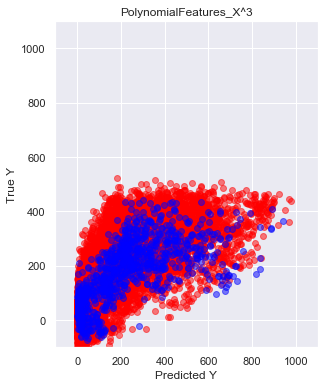

In [78]:
plt.figure(figsize=(16, 6))

# plt.subplot(1,3,1)
# plt.grid(True)
# plt.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color = 'blue')
# plt.title('no parameters setting')
# plt.ylabel("True Y")
# plt.xlabel("Predicted Y")
# plt.xlim(-100,1100)
# plt.ylim(-100,1100)

# plt.subplot(1,3,2)
# plt.grid(True)
# plt.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
# plt.title('grid search')
# plt.ylabel("True Y")
# plt.xlabel("Predicted Y")
# plt.xlim(-100,1100)
# plt.ylim(-100,1100)

plt.subplot(1,3,3)
plt.grid(True)
plt.scatter(y_train, train_predictions, alpha=0.5, color = "red")
plt.scatter(y_test, test_predictions, alpha=0.5, color = 'blue')
plt.title('PolynomialFeatures_X^3')
plt.ylabel("True Y")
plt.xlabel("Predicted Y")
plt.xlim(-100,1100)
plt.ylim(-100,1100);